imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
# loading the dataset and this data has only numerical value of the features given by principle component analysis
cc_data = pd.read_csv('/content/creditcard.csv')

In [27]:
cc_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [28]:
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
# dataset information
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [31]:
#misssing value in each column
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<ipython-input-32-1a354229f340>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cc_data.Class)


<Axes: xlabel='Class', ylabel='Density'>

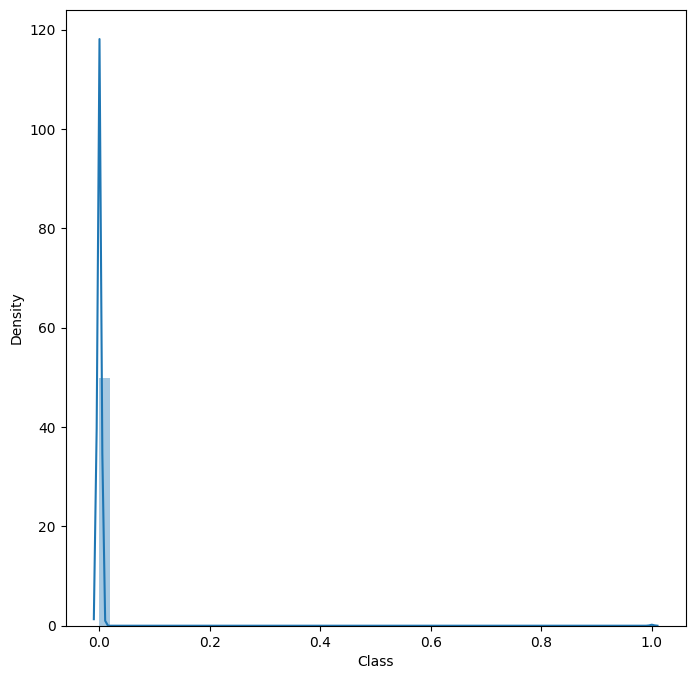

In [32]:
# plotting the values in a graph to analyse
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(cc_data.Class)
#24,26 has a cluster like shape

In [34]:
# filling the missing values with their mean of values
#if there are any missing values use this method
#cc_data['V6'].fillna(cc_data['V6'].mean(), inplace=True)
#cc_data['V7'].fillna(cc_data['V7'].median(), inplace=True)
#cc_data['V8'].fillna(cc_data['V8'].mode(), inplace=True)

cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
# distribution of logit and fraud transaction 0 are logit and 1 are fraud
cc_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [35]:
legit = cc_data[cc_data.Class == 0]
fraud = cc_data[cc_data.Class == 1]

In [36]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [37]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [38]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [39]:
# groupby().mean gives the mean of those columns w.r.t 0 and 1
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [41]:
legit_sample = legit.sample(n=492)

In [42]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
145191,86705.0,-2.430487,-2.754723,0.614637,0.136310,2.859452,0.528416,-2.648022,0.618780,1.843318,...,0.099930,1.775489,-0.777715,-0.492348,-2.967614,0.105931,0.997685,-0.011140,86.97,0
271657,164679.0,1.972630,0.093269,-1.762929,1.200183,0.646695,-0.591880,0.552765,-0.245525,-0.014355,...,0.086895,0.391932,-0.080872,-0.462821,0.469200,-0.484050,-0.023828,-0.072803,29.89,0
117650,74753.0,0.880157,-0.059809,0.207563,0.824987,0.551997,1.438014,-0.105802,0.488747,-0.375074,...,0.064237,0.179884,0.077406,-1.023142,0.152800,-0.423158,0.073955,0.012514,71.29,0
280900,169822.0,2.012338,-0.475782,-0.789072,0.121716,-0.277574,-0.218985,-0.430715,-0.043860,1.129201,...,-0.313337,-0.880346,0.287181,-1.020258,-0.529375,0.292140,-0.048605,-0.048657,41.94,0
139783,83352.0,-3.169677,-2.652799,1.478675,-3.055828,-0.339059,-0.241659,-1.094955,0.832926,0.486635,...,-0.397604,-0.741478,-0.774646,-0.236072,0.087063,-0.316777,0.282589,-0.645880,165.08,0


In [44]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96550.768293,0.042894,0.016468,-0.071293,-0.065973,-0.017760,-0.023868,0.071168,0.027224,0.010346,...,0.019430,-0.014842,-0.066758,0.011673,-0.041618,-0.014111,-0.031164,-0.009206,0.000578,97.622215
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [45]:
x = new_dataset.drop(columns = 'Class', axis = 1)
y = new_dataset['Class']
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
145191   86705.0 -2.430487 -2.754723  0.614637  0.136310  2.859452  0.528416   
271657  164679.0  1.972630  0.093269 -1.762929  1.200183  0.646695 -0.591880   
117650   74753.0  0.880157 -0.059809  0.207563  0.824987  0.551997  1.438014   
280900  169822.0  2.012338 -0.475782 -0.789072  0.121716 -0.277574 -0.218985   
139783   83352.0 -3.169677 -2.652799  1.478675 -3.055828 -0.339059 -0.241659   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [46]:
print(y)

145191    0
271657    0
117650    0
280900    0
139783    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [47]:
#splitting the dataset into training and testing data and the stratify means evenly distributing the 0s & 1s in the Class column(y)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [48]:
# shape of the splitted data
print(x.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
#Model training using logistic regression
model = LogisticRegression()
model.fit(X_train, Y_train)

In [53]:
#model evaluation using accuracy score
X_train_predict = model.predict(X_train)
# the below line compares the two dataset and stores the accuracy score in train_acc_score
train_acc_score = accuracy_score(X_train_predict, Y_train)

In [56]:
# above 0.8 is a good prediction
print("Accuracy Score of train data", train_acc_score)

Accuracy Score of train data 0.9250317662007624


In [57]:
X_test_predict = model.predict(X_test)
test_acc_score = accuracy_score(X_test_predict, Y_test)
print("Accuracy Score of test data", test_acc_score)
# It is important to get the acc_score of train data to check for overfitting & underfitting
# if train has more acc than test then the model is overfitted
# if test has more acc than train then the model is underfitted.

Accuracy Score of test data 0.8934010152284264
